In [1]:
##importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



In [2]:
##importing dataset
D_data= pd.read_csv("diabetes.csv")

In [3]:
D_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
D_data.shape

(768, 9)

In [5]:
D_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
D_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
D_data.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

In [8]:
D_data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [9]:
##Data Pre-processing

C:\Users\HP\AppData\Local\Temp\ipykernel_32560\592366782.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(D_data["Pregnancies"].value_counts())


<AxesSubplot: xlabel='Pregnancies', ylabel='Density'>

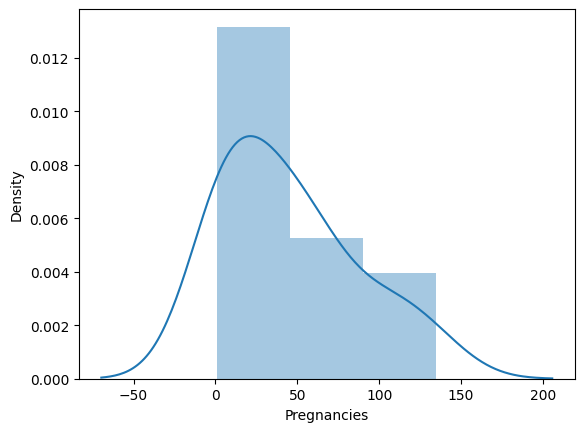

In [10]:
##imputing pregnancies feature
sns.distplot(D_data["Pregnancies"].value_counts())

In [11]:
print("total 0 values of D_data_Pregnancies:{0}".format(len(D_data.loc[D_data["Pregnancies"]==0])))
print("total 0 values of D_data_Glucose:{0}".format(len(D_data.loc[D_data["Glucose"]==0])))
print("total 0 values of D_data_BloodPressure:{0}".format(len(D_data.loc[D_data["BloodPressure"]==0])))
print("total 0 values of D_data_SkinThickness:{0}".format(len(D_data.loc[D_data["SkinThickness"]==0])))
print("total 0 values of D_data_Insulin:{0}".format(len(D_data.loc[D_data["Insulin"]==0])))
print("total 0 values of D_data_BMI:{0}".format(len(D_data.loc[D_data["BMI"]==0])))
print("total 0 values of D_data_DiabetesPedigreeFunction:{0}".format(len(D_data.loc[D_data["DiabetesPedigreeFunction"]==0])))
print("total 0 values of D_data_Age:{0}".format(len(D_data.loc[D_data["Age"]==0])))

total 0 values of D_data_Pregnancies:111
total 0 values of D_data_Glucose:5
total 0 values of D_data_BloodPressure:35
total 0 values of D_data_SkinThickness:227
total 0 values of D_data_Insulin:374
total 0 values of D_data_BMI:11
total 0 values of D_data_DiabetesPedigreeFunction:0
total 0 values of D_data_Age:0


In [12]:
D_data["Insulin"].value_counts()

0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64

In [13]:
D_data["SkinThickness"].value_counts()

0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26     16
22     16
37     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
11      6
43      6
16      6
45      6
14      6
44      5
10      5
48      4
47      4
49      3
50      3
8       2
7       2
52      2
54      2
63      1
60      1
56      1
51      1
99      1
Name: SkinThickness, dtype: int64

In [14]:
D_data["Insulin"].mean()

79.79947916666667

In [15]:
D_data["SkinThickness"].mean()

20.536458333333332

In [16]:
mean_ins= D_data["Insulin"].mean()

In [17]:
mean_skin_thick = D_data["SkinThickness"].mean()

In [19]:
D_data["Insulin"].replace(0, mean_ins, inplace= True)

In [20]:
D_data["SkinThickness"].replace(0, mean_skin_thick, inplace= True)

In [21]:
print("total 0 values of D_data_Insulin:{0}".format(len(D_data.loc[D_data["Insulin"]==0])))

total 0 values of D_data_Insulin:0


In [22]:
print("total 0 values of D_data_SkinThickness:{0}".format(len(D_data.loc[D_data["SkinThickness"]==0])))

total 0 values of D_data_SkinThickness:0


In [23]:
data_corr= D_data.corr()

<AxesSubplot: >

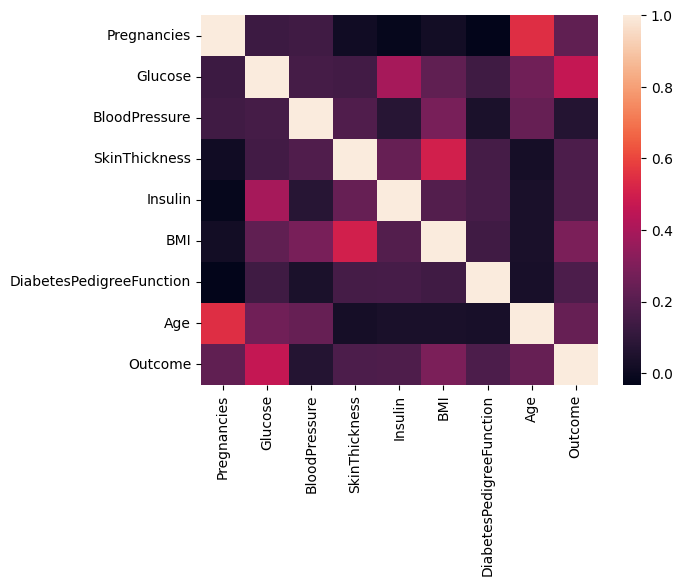

In [24]:
sns.heatmap(data_corr)

In [25]:
Y = D_data['Outcome']
X = D_data.drop("Outcome", axis=1)

In [26]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.1, random_state = 0 )

In [27]:
()##importing model
from sklearn.linear_model import LogisticRegression

In [28]:
model = LogisticRegression()
model.fit(X_train, Y_train)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
prediction1= model.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy = accuracy_score(Y_test,prediction1)

In [32]:
accuracy

0.8051948051948052

In [33]:
##importing Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB

In [35]:
model_2 = GaussianNB()

In [36]:
model_2.fit(X_train, Y_train)

GaussianNB()

In [37]:
prediction_2= model_2.predict(X_test)

In [38]:
accuracy2= accuracy_score(Y_test, prediction_2)

In [39]:
accuracy2

0.8181818181818182

In [40]:
##importing SVM

In [41]:
from sklearn import svm

In [42]:
model_3 = svm.SVC()

In [43]:
model_3.fit(X_train, Y_train)

SVC()

In [44]:
prediction3 =model_3.predict(X_test)

In [45]:
accuracy3= accuracy_score(Y_test, prediction3)

In [46]:
accuracy3

0.8571428571428571

In [47]:
##importing random forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
model_4= RandomForestClassifier()

In [50]:
model_4.fit(X_train, Y_train)

RandomForestClassifier()

In [51]:
prediction_4= model_4.predict(X_test)

In [52]:
accuracy4 = accuracy_score(Y_test, prediction_4 )

In [53]:
accuracy4

0.8051948051948052